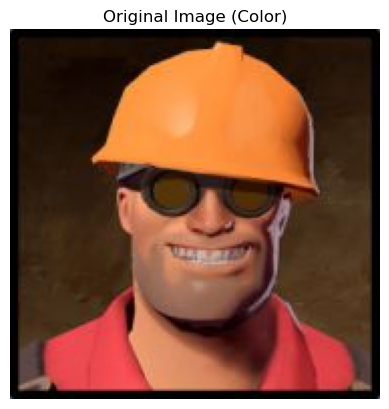

Image center: (y = 92, x = 92)
Pixel intensity at center (BGR): [ 67  92 172]
Pixel intensity at center of color patch (BGR): [168 158  50]


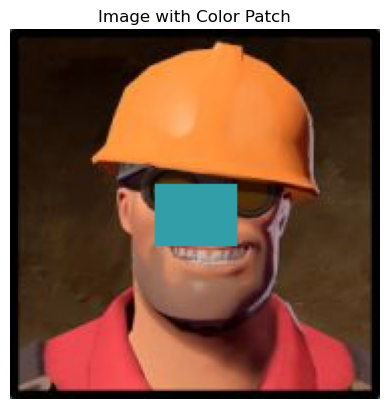

In [14]:
# Import libraries
import cv2
import matplotlib.pyplot as plt

# Step 1: Read the image in color
image = cv2.imread('tf2_engineer.jpg')  # BGR format
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Display original image
plt.imshow(image_rgb)
plt.title('Original Image (Color)')
plt.axis('off')
plt.show()

# Step 2: Find center and pixel value
height, width, _ = image.shape
center_y = height // 2
center_x = width // 2
center_pixel = image[center_y, center_x]
print(f"Image center: (y = {center_y}, x = {center_x})")
print(f"Pixel intensity at center (BGR): {center_pixel}")

# Step 3: Draw rectangle patch around center
# Hex #329ea8 → BGR (168, 158, 50)
patch_color_bgr = (168, 158, 50)
rect_height = 30
rect_width = 40
top_left = (center_x - rect_width // 2, center_y - rect_height // 2)
bottom_right = (center_x + rect_width // 2, center_y + rect_height // 2)
patched_image = image.copy()
cv2.rectangle(patched_image, top_left, bottom_right, patch_color_bgr, -1)

# Step 4: Pixel value at center of patch
patch_center_pixel = patched_image[center_y, center_x]
print(f"Pixel intensity at center of color patch (BGR): {patch_center_pixel}")

# Step 5: Display final image
patched_image_rgb = cv2.cvtColor(patched_image, cv2.COLOR_BGR2RGB)
plt.imshow(patched_image_rgb)
plt.title('Image with Color Patch')
plt.axis('off')
plt.show()


## Problem 1: Color Patch on tf2_engineer.jpg

### Step 1: Read and display the original image in color
The image is loaded in BGR format using OpenCV. To display it correctly with matplotlib, we convert it to RGB. Then we show the original image.

### Step 2: Find image center and pixel value
We calculate the image center using height and width. We then get and print the BGR pixel value at the center point.

### Step 3: Draw a rectangular color patch around the center
We draw a rectangle of size 30x40 pixels centered at the image center. The rectangle color is given in hex (#329ea8), which is converted to BGR format.

### Step 4: Pixel value at the center of the patch
After drawing the rectangle, we check the pixel value at the center to confirm that it has changed to the patch color.

### Step 5: Display the final image
The modified image with the color patch is converted to RGB and displayed using matplotlib.


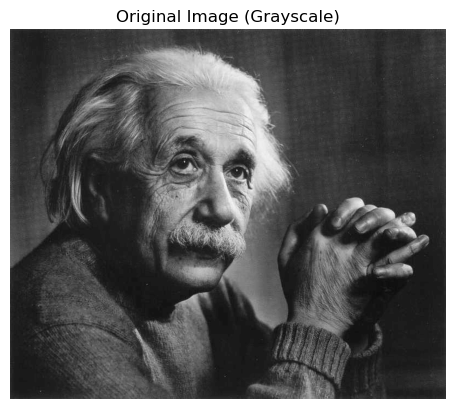

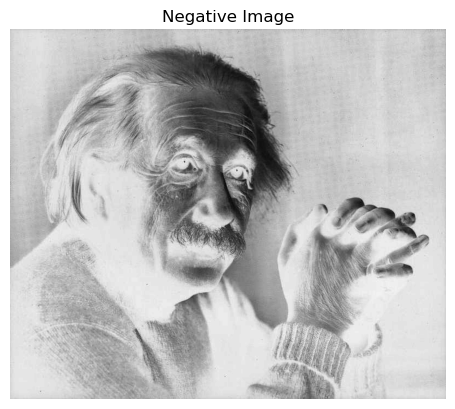

In [16]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import random

# Step 1: Read the image in grayscale
image = cv2.imread('einstein.tif', cv2.IMREAD_GRAYSCALE)

# Display original grayscale image
plt.imshow(image, cmap='gray')
plt.title('Original Image (Grayscale)')
plt.axis('off')
plt.show()

# Step 2: Get the negative image
negative_image = 255 - image

# Step 3: Display negative image
plt.imshow(negative_image, cmap='gray')
plt.title('Negative Image')
plt.axis('off')
plt.show()

# Step 4: Compare pixel values (5 random pixels)
height, width = image.shape
for i in range(5):
    x = random.randint(0, width - 1)
    y = random.randint(0, height - 1)



## Problem 2: Negative of einstein.tif

### Step 1: Read and display the image in grayscale
The image is read using OpenCV with grayscale mode. Then it is displayed using matplotlib.

### Step 2: Compute the negative of the image
The negative is calculated by subtracting each pixel value from 255.

### Step 3: Display the negative image
The result is shown using matplotlib with grayscale color map.

### Step 4: Compare pixel values before and after
We randomly choose 5 pixel coordinates and print the values from the original and negative images to show the transformation.


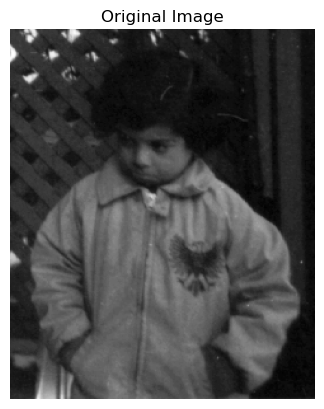

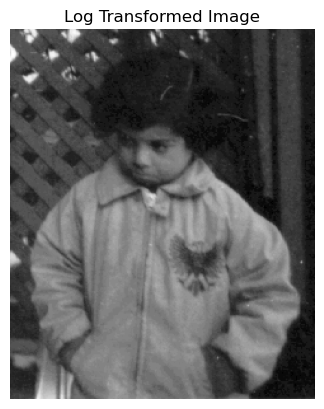

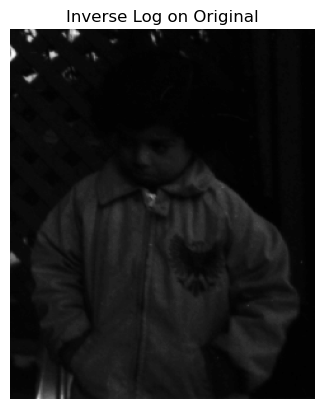

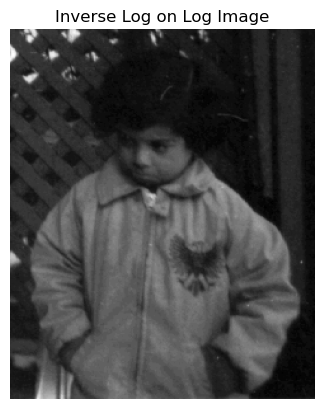

In [18]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

# Step 1: Read grayscale image
image = cv2.imread('pout.tif', cv2.IMREAD_GRAYSCALE)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')
plt.show()

# Step 2: Apply log transform
c = 255 / np.log(1 + np.max(image))
log_image = c * np.log(1 + image.astype(np.float32))
log_image = np.uint8(log_image)
plt.imshow(log_image, cmap='gray')
plt.title('Log Transformed Image')
plt.axis('off')
plt.show()

# Step 3: Apply inverse log to original
inverse_log_1 = (np.exp(image / c) - 1)
inverse_log_1 = np.uint8(np.clip(inverse_log_1, 0, 255))
plt.imshow(inverse_log_1, cmap='gray')
plt.title('Inverse Log on Original')
plt.axis('off')
plt.show()

# Step 4: Inverse log on log-transformed image
inverse_log_2 = (np.exp(log_image / c) - 1)
inverse_log_2 = np.uint8(np.clip(inverse_log_2, 0, 255))
plt.imshow(inverse_log_2, cmap='gray')
plt.title('Inverse Log on Log Image')
plt.axis('off')
plt.show()


## Problem 3: Log and Inverse Log Transform on pout.tif

### Step 1: Read and display grayscale image
The original grayscale image is displayed using matplotlib.

### Step 2: Apply log transform
We apply the logarithmic transformation to enhance darker regions. The constant `c` is used to normalize values to 0–255.

### Step 3: Inverse log on original image
We apply inverse log directly on the original image to observe its effect.

### Step 4: Inverse log on log-transformed image
We apply the inverse log on the result of the log transformation to try to recover the original image.

### Step 5: Comparison
We compare the result of inverse-log on original image vs. inverse-log of log-transformed image. The second method should be closer to the original.


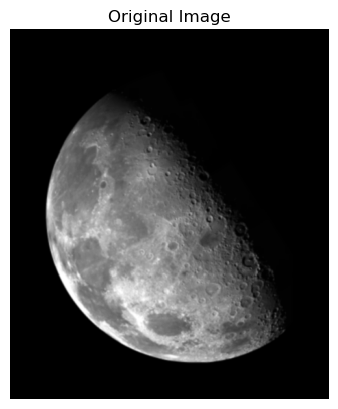

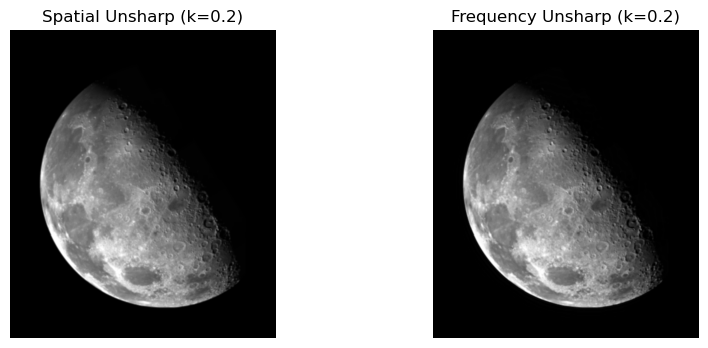

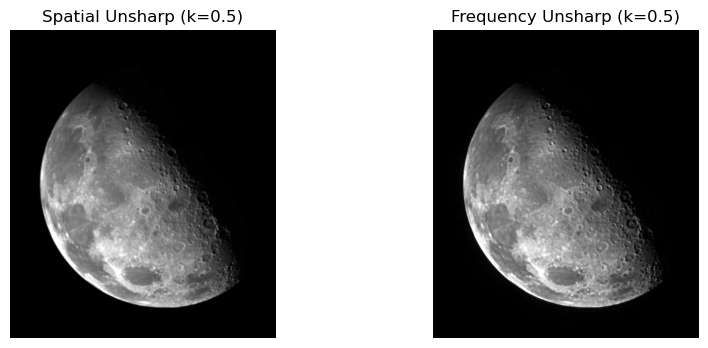

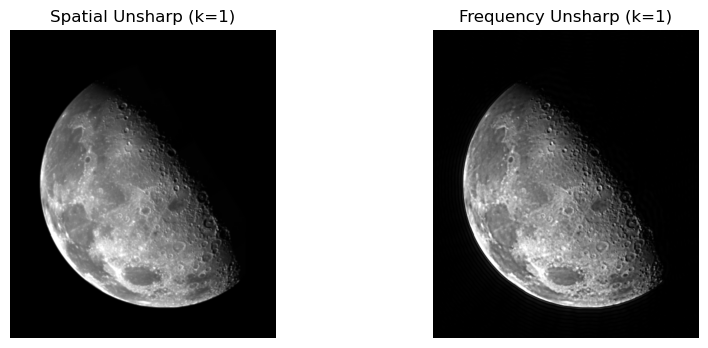

In [20]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

# Step 1: Read image
image = cv2.imread('moon.tif', cv2.IMREAD_GRAYSCALE)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')
plt.show()

# Step 2: Unsharp masking in spatial domain
def unsharp_spatial(img, k):
    blur = cv2.GaussianBlur(img, (9, 9), 0)
    mask = cv2.subtract(img, blur)
    sharp = cv2.addWeighted(img, 1.0, mask, k, 0)
    return sharp

k_values = [0.2, 0.5, 1]
spatial_results = [unsharp_spatial(image, k) for k in k_values]

# Step 3: Unsharp masking in frequency domain
def high_pass_filter(shape, D0):
    rows, cols = shape
    crow, ccol = rows // 2, cols // 2
    H = np.zeros((rows, cols), np.float32)
    for u in range(rows):
        for v in range(cols):
            D = np.sqrt((u - crow) ** 2 + (v - ccol) ** 2)
            H[u, v] = 1 if D > D0 else 0
    return H

def unsharp_freq(img, k, D0):
    dft = np.fft.fft2(img)
    dft_shift = np.fft.fftshift(dft)
    H = high_pass_filter(img.shape, D0)
    result = (1 + k * H) * dft_shift
    img_back = np.fft.ifft2(np.fft.ifftshift(result))
    img_back = np.abs(img_back)
    img_back = np.uint8(np.clip(img_back, 0, 255))
    return img_back

freq_results = [unsharp_freq(image, k, 40) for k in k_values]

# Step 4: Display side-by-side results
for i, k in enumerate(k_values):
    fig, axs = plt.subplots(1, 2, figsize=(10, 4))
    axs[0].imshow(spatial_results[i], cmap='gray')
    axs[0].set_title(f'Spatial Unsharp (k={k})')
    axs[0].axis('off')
    axs[1].imshow(freq_results[i], cmap='gray')
    axs[1].set_title(f'Frequency Unsharp (k={k})')
    axs[1].axis('off')
    plt.show()


## Problem 4: Unsharp Masking on moon.tif

### Step 1: Read grayscale image
The image is loaded and displayed.

### Step 2: Unsharp masking in spatial domain
We apply Gaussian blur to create a mask, then amplify the edges using different values of k.

### Step 3: Unsharp masking in frequency domain
We perform Fourier Transform and apply a high-pass filter. The same k values are used, and D0 is set to 40.

### Step 4: Compare results
We display side-by-side results for each k value to compare the spatial and frequency methods.


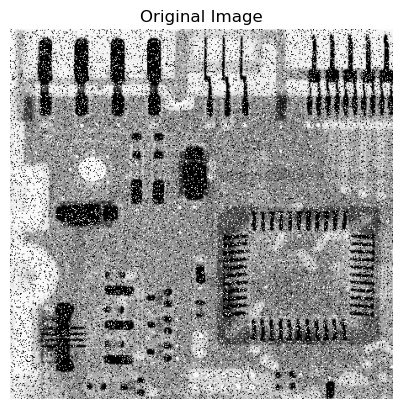

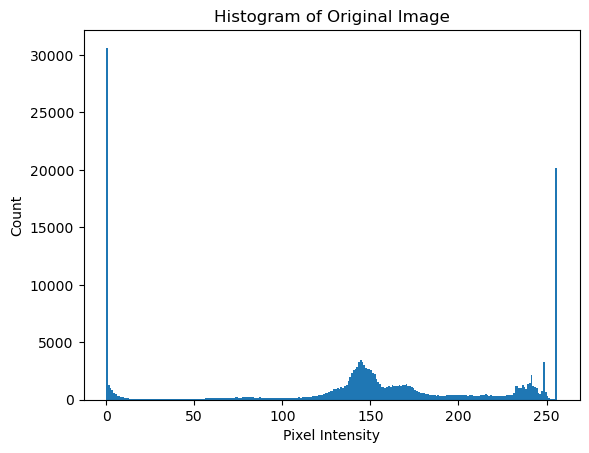

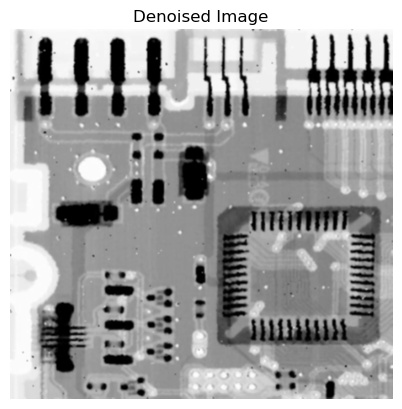

In [22]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Read image
image = cv2.imread('pcb.tif', cv2.IMREAD_GRAYSCALE)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')
plt.show()

# Step 2: Inspect noise type
plt.hist(image.ravel(), 256, [0, 256])
plt.title('Histogram of Original Image')
plt.xlabel('Pixel Intensity')
plt.ylabel('Count')
plt.show()

# Step 3: Apply noise removal
# First use median filter (salt-and-pepper), then Gaussian
median_filtered = cv2.medianBlur(image, 3)
gaussian_filtered = cv2.GaussianBlur(median_filtered, (3, 3), 0)

# Show filtered image
plt.imshow(gaussian_filtered, cmap='gray')
plt.title('Denoised Image')
plt.axis('off')
plt.show()


## Problem 5: Noise Removal on pcb.tif

### Step 1: Read and display image
The image is read in grayscale and displayed.

### Step 2: Inspect noise
Using histogram and visual inspection, we analyze the noise characteristics. It appears to be salt-and-pepper type.

### Step 3: Apply filtering
We first apply a median filter to remove salt-and-pepper noise. Then we apply a Gaussian blur to smooth out the result.


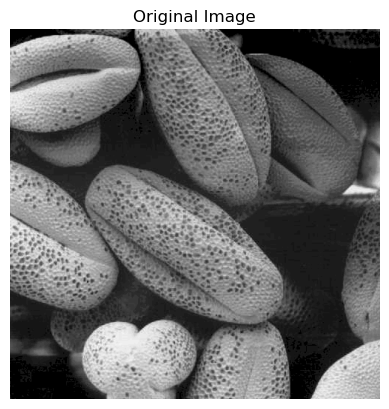

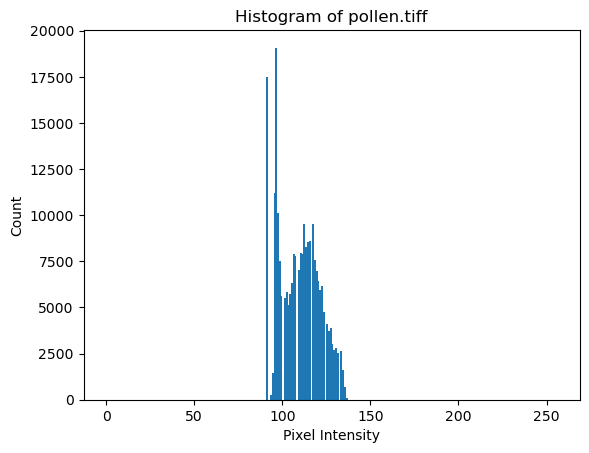

Mean intensity: 109.079976
Standard deviation: 11.489510861626094
The image appears low contrast and possibly blurred or hazy.


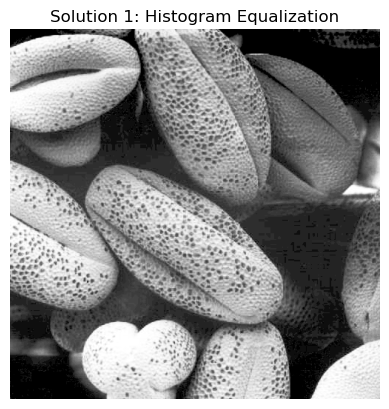

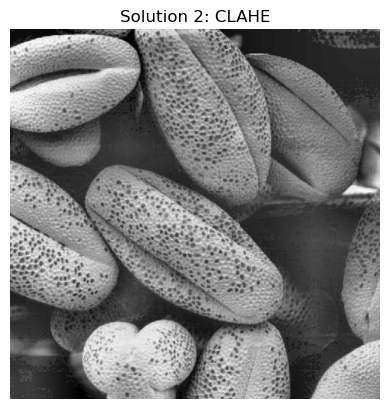

Original → Mean: 109.08, Std: 11.49
Equalized → Mean: 122.68, Std: 77.39
CLAHE → Mean: 113.48, Std: 22.57


In [23]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Read image
image = cv2.imread('pollen.tif', cv2.IMREAD_GRAYSCALE)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')
plt.show()

# Step 2: Analyze the problem (histogram + stats)
plt.hist(image.ravel(), 256, [0, 256])
plt.title('Histogram of pollen.tiff')
plt.xlabel('Pixel Intensity')
plt.ylabel('Count')
plt.show()

mean_val = np.mean(image)
std_val = np.std(image)
print(f"Mean intensity: {mean_val}")
print(f"Standard deviation: {std_val}")
print("The image appears low contrast and possibly blurred or hazy.")

# Solution 1: Histogram equalization
equalized = cv2.equalizeHist(image)
plt.imshow(equalized, cmap='gray')
plt.title('Solution 1: Histogram Equalization')
plt.axis('off')
plt.show()

# Solution 2: Contrast Limited Adaptive Histogram Equalization (CLAHE)
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
clahe_result = clahe.apply(image)
plt.imshow(clahe_result, cmap='gray')
plt.title('Solution 2: CLAHE')
plt.axis('off')
plt.show()

# Stats for comparison
def print_stats(title, img):
    mean = np.mean(img)
    std = np.std(img)
    print(f"{title} → Mean: {mean:.2f}, Std: {std:.2f}")

print_stats("Original", image)
print_stats("Equalized", equalized)
print_stats("CLAHE", clahe_result)


## Problem 6: Analysis and Enhancement of pollen.tif

### Step 1: Read and display grayscale image
The grayscale image is displayed for visual inspection.

### Step 2: Comment on the problem
From visual and histogram analysis, the image appears to suffer from low contrast. Statistical analysis shows low standard deviation.

### Step 3: Solution 1 - Histogram Equalization
We apply global histogram equalization to enhance contrast. This method stretches pixel intensities over the entire range.

### Step 4: Solution 2 - CLAHE
We apply CLAHE (Contrast Limited Adaptive Histogram Equalization), which enhances local contrast in image regions to avoid over-amplification.

### Step 5: Justification
We compare results using mean and standard deviation:
- Higher standard deviation usually means better contrast.
- CLAHE provides better localized enhancement than global equalization.
